In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
data_dist = pd.read_csv(r'C:\Users\danyl\Downloads\Nouveau dossier\USA-road-d.CAL.gr',sep = " ",header = None)
data_time = pd.read_csv(r'C:\Users\danyl\Downloads\Nouveau dossier\USA-road-t.CAL.gr',sep = " ", header = None)
node = pd.read_csv(r'C:\Users\danyl\Downloads\Nouveau dossier\USA-road-d.CAL.co',sep = " ", header = None)


In [ ]:
import networkx as nx
G=nx.Graph()
for key,value in data_dist.iterrows():
    G.add_edge(value[1], value[2], dist=value[3] )


In [ ]:
def get_shortest_path(graph, start,end):
    G = graph
    to_visit = [start]
    path = []
    i = 0
    visited = []
    while end not in to_visit:
        if to_visit[i] not in visited:

            for k in list(G.neighbors(to_visit[i])):
                to_visit.append(k)
            path.append(list(G.neighbors(to_visit[i])))
            visited.append(to_visit[i])
        i = i + 1
    element = visited[-1]
    i = 1
    result = [end, element]
    while i <100000 and element !=start:
        p = []
        for k in range(len(path)):
            for i in range(len(path[k])):
                if path[k][i] == element:
                    p.append(k)
        element = visited[p[0]]
        i = i+1
        result.append(element)
    result.reverse()
    return(result)
        




In [ ]:
def get_distance_nodes(function, start, end):
    a = function.loc[(function[1] == start) & (function[2] == end)]
    if len(a)>0 : 
        return int(a[3])
    else: 
        return 0
    

In [ ]:
def get_distance(function, start, end):
    path = get_shortest_path(G, start,end)
    i =0
    sum = 0
    while i < len(path)-1:
        sum = sum + get_distance_nodes(function, path[i], path[i+1])
        i = i+1
        
    return(sum)
        
        

In [ ]:
from itertools import permutations
def f2(list_nodes, function):
    l = []
    for s in permutations(list_nodes):
        case = list(s)
        sum_tot = 0
        i = 0
        while i < len(case)-1:
            sum_tot = sum_tot + get_distance(function, case[i], case[i+1])
            i = i +1
        element = (case, sum_tot)
        l.append(element)
    l = sorted(l, key=lambda tup: (tup[1]),reverse = False)
    best_net = l[0][0]

    i = 0
    list_edge = []
    while i < len(best_net)-1:
            list_edge = list_edge + get_shortest_path(G, best_net[i],best_net[i+1])
            i = i+1
    return(list_edge)
    

In [242]:

    
def visu_2(G,list_nodes,function):
    result = f2(list_nodes, function)
    edges = []
    for k in result:
        for i in list(G.neighbors(k)):
            edges.append((k,i))
    r = []
    i = 0
    while i < len(result) -1:
        edges.append((result[i],result[i+1]))
        r.append((result[i],result[i+1]))
        i = i+1
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)


    G1 = nx.DiGraph()
    G1.add_edges_from(edges)

    val_map = {1: 2.0,
               }

    values = [val_map.get(node, 0.25) for node in G1.nodes()]

    # Specify the edges you want here

    red_edges = r
    edge_colours = ['black' if not edge in red_edges else 'red'
                    for edge in G1.edges()]
    black_edges = [edge for edge in G1.edges() if edge not in red_edges]

    # Need to create a layout when doing
    # separate calls to draw nodes and edges
    pos = nx.spring_layout(G1)
    nx.draw_networkx_nodes(G1, pos, cmap=plt.get_cmap('jet'), 
                           node_color = values, node_size = 1)
    nx.draw_networkx_labels(G1, pos)
    nx.draw_networkx_edges(G1, pos, edgelist=red_edges, edge_color='red', arrows=True)
    nx.draw_networkx_edges(G1, pos, edgelist=black_edges, edge_color='black',arrows=False)
    plt.show()

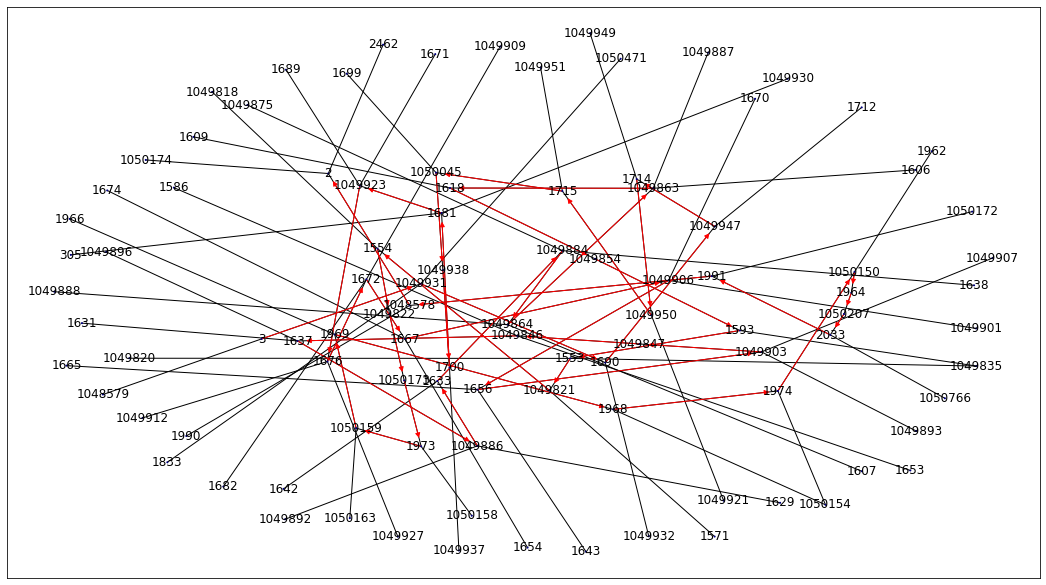

In [253]:
visu_2(G,[3,2],data_dist)